# Exercises

---

## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

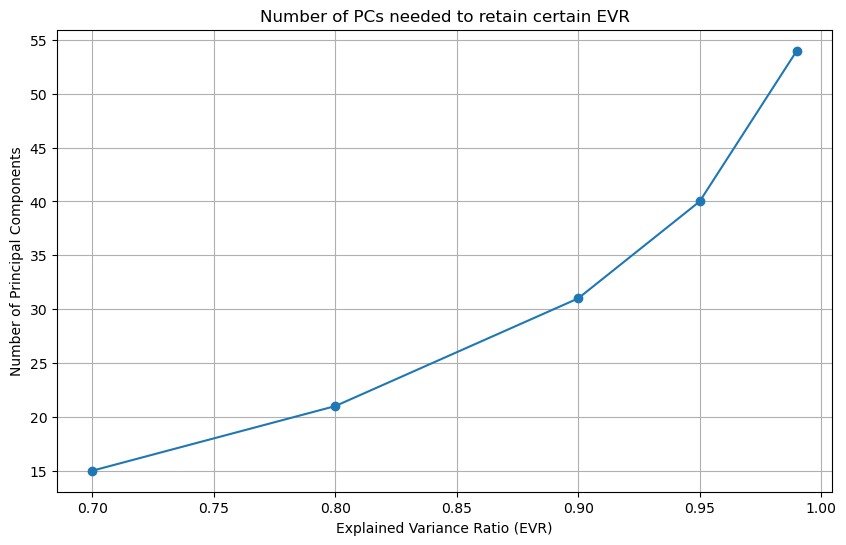

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to determine the number of PCs needed to retain a given percentage of explained variance
def num_pcs_for_evr(evr_goal, explained_variance_ratio):
    cumulative_evr = np.cumsum(explained_variance_ratio)
    return np.searchsorted(cumulative_evr, evr_goal) + 1

# Load the digit dataset
dataset = load_digits()
images = dataset.data

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(images)

# Perform PCA
pca = PCA()
pca.fit(X)

# Desired explained variance ratios to test
evr_goals = [0.7, 0.8, 0.9, 0.95, 0.99]

# Calculate the number of PCs needed for each EVR goal
num_pcs = [num_pcs_for_evr(goal, pca.explained_variance_ratio_) for goal in evr_goals]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(evr_goals, num_pcs, marker='o')
plt.xlabel('Explained Variance Ratio (EVR)')
plt.ylabel('Number of Principal Components')
plt.title('Number of PCs needed to retain certain EVR')
plt.grid(True)
plt.show()


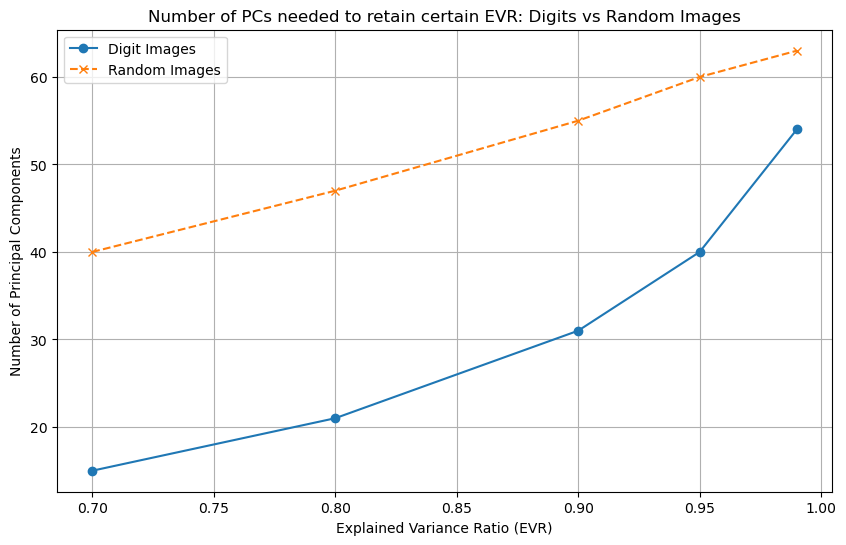

In [4]:

# Perform PCA on digit images
pca_digits = PCA()
pca_digits.fit(X)

# Calculate the number of PCs needed for each EVR goal for digit images
num_pcs_digits = [num_pcs_for_evr(goal, pca_digits.explained_variance_ratio_) for goal in evr_goals]

# Generate random images by permuting the pixels in each image independently
random_images = np.copy(images)
for i in range(random_images.shape[0]):
    np.random.shuffle(random_images[i])

# Standardize the random images
X_random = scaler.fit_transform(random_images)


# Perform PCA on random images
pca_random = PCA()
pca_random.fit(X_random)

# Calculate the number of PCs needed for each EVR goal for random images
num_pcs_random = [num_pcs_for_evr(goal, pca_random.explained_variance_ratio_) for goal in evr_goals]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(evr_goals, num_pcs_digits, marker='o', label='Digit Images')
plt.plot(evr_goals, num_pcs_random, marker='x', label='Random Images', linestyle='--')
plt.xlabel('Explained Variance Ratio (EVR)')
plt.ylabel('Number of Principal Components')
plt.title('Number of PCs needed to retain certain EVR: Digits vs Random Images')
plt.legend()
plt.grid(True)
plt.show()

For digit images, fewer principal components are needed to retain a certain fraction of explained variance due to their inherent structure and patterns. In contrast, random images require more PCs because they lack this structure, spreading the variance more uniformly across dimensions. This highlights PCA's effectiveness in capturing underlying patterns in structured data.

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?